Global minimum for f(x): 1.00
Iterations taken: 50


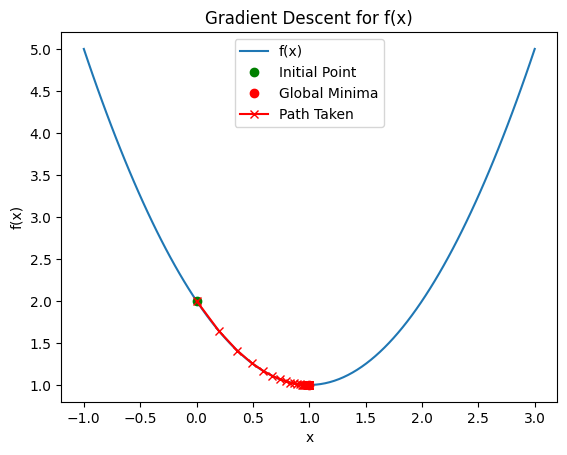

Global minimum for f(x, y): (0.67, 0.45)
Iterations taken: 1000


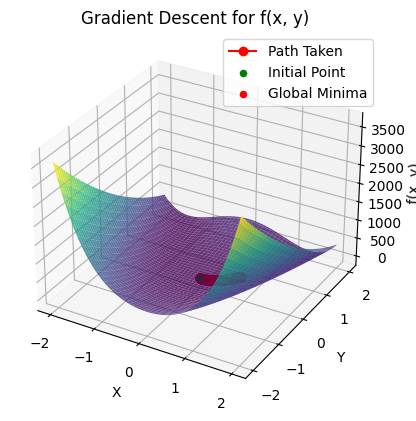

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f1(x):
    return x**2 - 2*x + 2

# Define the derivative of f(x)
def df1(x):
    return 2*x - 2

# Define the function f(x, y)
def f2(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the partial derivatives of f(x, y)
def df2_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df2_dy(x, y):
    return 200 * (y - x**2)

# Gradient Descent function for f(x)
def gradient_descent_f1(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]

    for i in range(num_iterations):
        gradient = df1(x)
        x = x - learning_rate * gradient
        x_history.append(x)

    return x, x_history, num_iterations

# Gradient Descent function for f(x, y)
def gradient_descent_f2(initial_x, initial_y, learning_rate, num_iterations):
    x = initial_x
    y = initial_y
    x_history = [x]
    y_history = [y]

    for i in range(num_iterations):
        gradient_x = df2_dx(x, y)
        gradient_y = df2_dy(x, y)
        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y
        x_history.append(x)
        y_history.append(y)

    return (x, y), x_history, y_history, num_iterations

# Example for f(x)
initial_x = 0
learning_rate = 0.1
num_iterations = 50

x, x_history, iterations = gradient_descent_f1(initial_x, learning_rate, num_iterations)

print("Global minimum for f(x): {:.2f}".format(x))
print("Iterations taken:", iterations)

# Plotting for f(x)
x_vals = np.linspace(-1, 3, 100)
plt.plot(x_vals, f1(x_vals), label='f(x)')
plt.plot(initial_x, f1(initial_x), 'go', label='Initial Point')
plt.plot(x, f1(x), 'ro', label='Global Minima')
plt.plot(x_history, f1(np.array(x_history)), 'rx-', label='Path Taken')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent for f(x)')
plt.legend()
plt.show()

# Example for f(x, y)
initial_x = 0
initial_y = 0
learning_rate = 0.001
num_iterations = 1000

(x, y), x_history, y_history, iterations = gradient_descent_f2(initial_x, initial_y, learning_rate, num_iterations)

print("Global minimum for f(x, y): ({:.2f}, {:.2f})".format(x, y))
print("Iterations taken:", iterations)

# Plotting for f(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f2(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot(x_history, y_history, f2(np.array(x_history), np.array(y_history)), 'ro-', label='Path Taken')
ax.scatter(initial_x, initial_y, f2(initial_x, initial_y), color='green', label='Initial Point')
ax.scatter(x, y, f2(x, y), color='red', label='Global Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent for f(x, y)')
ax.legend()
plt.show()